# <center> Exploratory Data Analysis </center>

## 1. Знакомство с библиотекой numpy

**NumPy** — библиотека языка Python, позволяющая [удобно] работать с многомерными массивами и матрицами, содержащая математические функции. Кроме того, NumPy позволяет векторизовать многие вычисления, имеющие место в машинном обучении. 

 - [numpy](http://www.numpy.org)
 - [numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)
 - [100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)
 - [numpy data types](https://docs.scipy.org/doc/numpy/user/basics.types.html)

In [1]:
import numpy as np

Основным типом данных NumPy является многомерный массив элементов одного типа — [numpy.ndarray](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.array.html). Каждый подобный массив имеет несколько *измерений* или *осей* — в частности, вектор (в классическом понимании) является одномерным массивом и имеет 1 ось, матрица является двумерным массивом и имеет 2 оси и т.д.

Создать массив из списков или кортежей можно с помощью функции ```np.array()```. 

```np.array``` - функция, создающая объект типа ```np.ndarray```.

In [7]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])
matrix

array([[1, 2, 3],
       [4, 5, 6]])

In [3]:
type(matrix)

numpy.ndarray

In [183]:
matrix.ndim

2

In [184]:
matrix.shape

(2, 3)

Чтобы узнать длину массива по каждой из осей, можно воспользоваться атрибутом ```shape```. Общее количество элементов выводим с помощью ```size```.

In [7]:
matrix.shape, matrix.size

((2, 3), 6)

Альтернативные способы задать матрицу:

In [6]:
np.matrix('1 2; 3 4') # аргумент - строка или список

matrix([[1, 2],
        [3, 4]])

In [8]:
np.ndarray(shape=(3,3)) # из случайных чисел

array([[ 2.60605835e-31, -5.21211670e-31,  1.30302917e-31],
       [-5.21211670e-31,  1.13363538e-30, -3.51817877e-31],
       [ 1.30302917e-31, -3.51817877e-31,  2.01969522e-31]])

Массивы специального вида можно создать при помощи функций zeros, ones, empty, identity:

In [11]:
np.zeros((3,))

array([0., 0., 0.])

In [12]:
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [14]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [15]:
type(1.)

float

In [2]:
np.empty((2, 5))

array([[0.00000000e+000, 1.28822983e-231, 2.47032823e-323,
        0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 2.31584192e+077,
        9.88131292e-324, 6.95335581e-309]])

Еще можно создавать массивы при помощи функции arange:

In [16]:
np.arange(2, 21, 3)

array([ 2,  5,  8, 11, 14, 17, 20])

In [4]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [5]:
np.arange(9).reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Вместо значения длины массива по одному из измерений можно указать -1 — в этом случае значение будет рассчитано автоматически:

In [6]:
np.arange(8).reshape(2, -1)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

Теперь порешаем задачки!

**Задание 1.** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.

In [26]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

def max_element(x):
    if x.all() != 0 or ((x[:-1].all() != 0) & (x[-1] == 0)):
        return ('None')
    else:
        zero = x == 0
        a = x[1:][zero[:-1]]
        b = a.max()
        return b

y = np.random.randint(9, size=10)
print ('Случайный вектор:', y, 'Максимальный элемент:', max_element(y), sep='\n')

Случайный вектор:
[0 1 2 0 6 0 0 1 4 5]
Максимальный элемент:
6


In [28]:
x = np.array([6, 2, 3, 5, 7, 0])

In [29]:
max_element(x)

'None'

In [47]:
x = np.array([1, 5, 8, 6, 6, 1, 7, 4, 4, 0])

def max_element_before_zero(x):
    shift_by_one = np.hstack((1, x))
    bool_array = (shift_by_one == 0)[:np.size(shift_by_one) - 1]
    if np.size(x[bool_array]) == 0:
        return None
    else:
        return np.max(x[bool_array])
y = np.random.randint(9, size=10)    
print ('Пример:', x, 'Максимальный элемент:', max_element_before_zero(x), sep='\n')
print ('Случайный вектор:', y, 'Максимальный элемент:', max_element_before_zero(y), sep='\n')

Пример:
[1 5 8 6 6 1 7 4 4 0]
Максимальный элемент:
None
Случайный вектор:
[8 6 0 2 8 4 0 4 8 2]
Максимальный элемент:
4


**Задание 2.** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [17]:
def nearest_value(X, v):
    Y = np.abs(X - v)
    m = np.min(Y)
    inds = np.where(Y == m)
    return X[inds[0][0], inds[1][0]]

X = np.arange(0,10).reshape((2, 5))
v = 3.6
print ('Матрица:', X, 'Число:', v, 'Ближайший к числу элемент матрицы:', nearest_value(X, v), sep='\n')

Матрица:
[[0 1 2 3 4]
 [5 6 7 8 9]]
Число:
3.6
Ближайший к числу элемент матрицы:
4


In [18]:
X

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [19]:
X - v

array([[-3.6, -2.6, -1.6, -0.6,  0.4],
       [ 1.4,  2.4,  3.4,  4.4,  5.4]])

In [ ]:
# for i in range(len(lst)):
#     for j in range(len(lst[i])):
#         lst[i][j] -= v
# O(n^2)

In [21]:
Y = np.abs(X - v)
Y

array([[3.6, 2.6, 1.6, 0.6, 0.4],
       [1.4, 2.4, 3.4, 4.4, 5.4]])

In [24]:
np.min(Y, axis=0)

array([1.4, 2.4, 1.6, 0.6, 0.4])

In [25]:
np.min(Y, axis=1)

array([0.4, 1.4])

In [26]:
np.min(Y)

0.3999999999999999

In [28]:
m = np.min(Y)
m

0.3999999999999999

In [30]:
np.where(Y == m)

(array([0]), array([4]))

In [32]:
np.where(Y == m)[0][0]

0

In [34]:
np.where(Y == m)[1][0]

4

In [36]:
X

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [38]:
X[0][4]

4

In [35]:
X[0, 4]

4

In [67]:
# Решение в одну строку
def get_nearest_value(X, v):
    return int(np.min(np.abs(X - v)) + v)

print ('Матрица:', X, 'Число:', v, 
       'Ближайший к числу элемент матрицы:', get_nearest_value(X, v), sep='\n')

Матрица:
[[0 1 2 3 4]
 [5 6 7 8 9]]
Число:
3.6
Ближайший к числу элемент матрицы:
4


**Задание 3.** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [71]:
def scale(X):
    std_deviation = X.std(axis=0)
    std_deviation[std_deviation == 0] = 1
    X = X - X.mean(axis=0) # или X -= X.mean(axis=0) c преобразованием X = X.astype(np.float)
    X /= std_deviation
    #X = X / std_deviation
    return X 

X = np.random.randint(-7, 8, size=(2,5))
print ('Матрица:', X, 'Масштабированная матрица:', scale(X), sep='\n')

Матрица:
[[ 2  4 -3  5  0]
 [ 0  0 -3 -2  0]]
Масштабированная матрица:
[[ 1.  1.  0.  1.  0.]
 [-1. -1.  0. -1.  0.]]


In [52]:
std_deviation = X.std(axis=0)

In [54]:
std_deviation[std_deviation == 0] = 1

In [53]:
std_deviation[std_deviation == 0]

array([], dtype=float64)

In [55]:
std_deviation

array([5. , 1.5, 7. , 4.5, 5. ])

In [61]:
X

array([[ 7, -3, -7,  2, -3],
       [-3,  0,  7, -7,  7]])

In [59]:
X.mean(axis=0)

array([ 2. , -1.5,  0. , -2.5,  2. ])

In [62]:
(X - X.mean(axis=0)) / std_deviation

array([[ 1., -1., -1.,  1., -1.],
       [-1.,  1.,  1., -1.,  1.]])

##  2. Pandas и первичный анализ данных

**Pandas** (Python Data Analysis Library) — библиотека языка Python для удобных обработки и анализа данных.

Небольшой список литературы:

1. [Шпаргалка по pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

2. [Введение в pandas](https://khashtamov.com/ru/pandas-introduction/)

3. [Статься в блоге сообщества OpenDataScience на Habr](https://habr.com/ru/company/ods/blog/322626/)

4. [Туториалы в официальной документации (на английском)](https://pandas.pydata.org/docs/getting_started/10min.html)

In [72]:
import pandas as pd

Качаем набор данных о футболистах из гитхаба курса, сохраняем в формате csv. Далее загружаем в Jupyter Notebook и внимательно указываем путь к файлу (в какие папки нужно перейти, чтобы увидеть файл).

In [93]:
df = pd.read_csv('~/data-sci-econ-20/sem06_eda/data_football_profile.csv', sep='\t')

In [79]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Club', 'Value', 'Wage'], dtype='object')

In [94]:
df.head(7)

Name   Age Nationality                 Club        Value      Wage
0      L. Messi  31.0   Argentina         FC Barcelona  110500000.0  565000.0
1           NaN  33.0    Portugal             Juventus   77000000.0  405000.0
2     Neymar Jr  26.0      Brazil  Paris Saint-Germain  118500000.0  290000.0
3        De Gea  27.0       Spain    Manchester United   72000000.0  260000.0
4  K. De Bruyne  27.0     Belgium      Manchester City  102000000.0  355000.0
5     E. Hazard  27.0     Belgium              Chelsea   93000000.0  340000.0
6     L. Modrić  32.0     Croatia          Real Madrid   67000000.0  420000.0

In [84]:
df.tail(3)

Name   Age Nationality              Club    Value    Wage
12894             NaN  16.0     England  Cambridge United      NaN  1000.0
12895  D. Walker-Rice  17.0     England   Tranmere Rovers  60000.0  1000.0
12896       G. Nugent  16.0     England   Tranmere Rovers  60000.0  1000.0

In [88]:
df['Name'][327:765]

327       S. Ulreich
328              NaN
329          Marcelo
330       S. Coleman
331    Nacho Monreal
           ...      
760     H. Nordtveit
761         L. Zuffi
762          Y. Mutō
763      J. Altidore
764    Thiago Mendes
Name: Name, Length: 438, dtype: object

In [87]:
df.Name[:10]

0        L. Messi
1             NaN
2       Neymar Jr
3          De Gea
4    K. De Bruyne
5       E. Hazard
6       L. Modrić
7       L. Suárez
8    Sergio Ramos
9        J. Oblak
Name: Name, dtype: object

In [90]:
df[['Name', 'Age', 'Nationality']].head(8)

Name   Age Nationality
0      L. Messi  31.0   Argentina
1           NaN  33.0    Portugal
2     Neymar Jr  26.0      Brazil
3        De Gea  27.0       Spain
4  K. De Bruyne  27.0     Belgium
5     E. Hazard  27.0     Belgium
6     L. Modrić  32.0     Croatia
7     L. Suárez  31.0     Uruguay

Функция возвращает DataFrame (то есть таблицу), однако затем приобретает ещё много важных параметров, среди которых:

* sep — разделитель данных, по умолчанию ',';
* decimal — разделитель числа на целую и дробную часть, по умолчанию'.';
* names — список с названиями колонок, не обязательный параметр;
* skiprows — если файл содержит системную информацию, можно просто её пропустить. Необязательный параметр.

Дополнительные параметры можно посмотреть в [официальной документации.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

С помощью функции ```head``` можем посмотреть на первые несколько строк нашего датасета:

In [153]:
df.head()

Name   Age Nationality                 Club        Value      Wage
0      L. Messi  31.0   Argentina         FC Barcelona  110500000.0  565000.0
1           NaN  33.0    Portugal             Juventus   77000000.0  405000.0
2     Neymar Jr  26.0      Brazil  Paris Saint-Germain  118500000.0  290000.0
3        De Gea  27.0       Spain    Manchester United   72000000.0  260000.0
4  K. De Bruyne  27.0     Belgium      Manchester City  102000000.0  355000.0

In [101]:
df['ones'] = 1

In [96]:
df

Name   Age Nationality                 Club        Value  \
0                L. Messi  31.0   Argentina         FC Barcelona  110500000.0   
1                     NaN  33.0    Portugal             Juventus   77000000.0   
2               Neymar Jr  26.0      Brazil  Paris Saint-Germain  118500000.0   
3                  De Gea  27.0       Spain    Manchester United   72000000.0   
4            K. De Bruyne  27.0     Belgium      Manchester City  102000000.0   
...                   ...   ...         ...                  ...          ...   
12892        J. Lundstram  19.0     England      Crewe Alexandra    1100000.0   
12893  N. Christoffersson  19.0      Sweden       Trelleborgs FF      60000.0   
12894                 NaN  16.0     England     Cambridge United          NaN   
12895      D. Walker-Rice  17.0     England      Tranmere Rovers      60000.0   
12896           G. Nugent  16.0     England      Tranmere Rovers      60000.0   

           Wage  ones  
0      565000.0     1  
1      405000.0     1  
2      290000.0     1  
3      260000.0     1  
4      355000.0     1  
...         ...   ...  
12892    1000.0     1  
12893    1000.0     1  
12894    1000.0     1  
12895    1000.0     1  
12896    1000.0     1  

[12897 rows x 7 columns]

In [103]:
df

Name   Age Nationality                 Club        Value  \
0                L. Messi  31.0   Argentina         FC Barcelona  110500000.0   
1                     NaN  33.0    Portugal             Juventus   77000000.0   
2               Neymar Jr  26.0      Brazil  Paris Saint-Germain  118500000.0   
3                  De Gea  27.0       Spain    Manchester United   72000000.0   
4            K. De Bruyne  27.0     Belgium      Manchester City  102000000.0   
...                   ...   ...         ...                  ...          ...   
12892        J. Lundstram  19.0     England      Crewe Alexandra    1100000.0   
12893  N. Christoffersson  19.0      Sweden       Trelleborgs FF      60000.0   
12894                 NaN  16.0     England     Cambridge United          NaN   
12895      D. Walker-Rice  17.0     England      Tranmere Rovers      60000.0   
12896           G. Nugent  16.0     England      Tranmere Rovers      60000.0   

           Wage  ones  
0      565000.0     1  
1      405000.0     1  
2      290000.0     1  
3      260000.0     1  
4      355000.0     1  
...         ...   ...  
12892    1000.0     1  
12893    1000.0     1  
12894    1000.0     1  
12895    1000.0     1  
12896    1000.0     1  

[12897 rows x 7 columns]

In [105]:
df.drop(['ones'], axis=1, inplace=True)

KeyError: "['ones'] not found in axis"

In [106]:
df

Name   Age Nationality                 Club        Value  \
0                L. Messi  31.0   Argentina         FC Barcelona  110500000.0   
1                     NaN  33.0    Portugal             Juventus   77000000.0   
2               Neymar Jr  26.0      Brazil  Paris Saint-Germain  118500000.0   
3                  De Gea  27.0       Spain    Manchester United   72000000.0   
4            K. De Bruyne  27.0     Belgium      Manchester City  102000000.0   
...                   ...   ...         ...                  ...          ...   
12892        J. Lundstram  19.0     England      Crewe Alexandra    1100000.0   
12893  N. Christoffersson  19.0      Sweden       Trelleborgs FF      60000.0   
12894                 NaN  16.0     England     Cambridge United          NaN   
12895      D. Walker-Rice  17.0     England      Tranmere Rovers      60000.0   
12896           G. Nugent  16.0     England      Tranmere Rovers      60000.0   

           Wage  
0      565000.0  
1      405000.0  
2      290000.0  
3      260000.0  
4      355000.0  
...         ...  
12892    1000.0  
12893    1000.0  
12894    1000.0  
12895    1000.0  
12896    1000.0  

[12897 rows x 6 columns]

Удалим колонку Value, к которой мы не знаем точную интерпретацию:

In [154]:
df.drop(['Value'], axis=1, inplace=True)

In [155]:
# последние несколько строк:
df.tail(3)

Name   Age Nationality              Club    Wage
12894             NaN  16.0     England  Cambridge United  1000.0
12895  D. Walker-Rice  17.0     England   Tranmere Rovers  1000.0
12896       G. Nugent  16.0     England   Tranmere Rovers  1000.0

Посмотрим на размер нашего датасета. Первое число – количество строк (наблюдений), второе – количество столбцов (признаков):

In [107]:
df.shape

(12897, 6)

Если вы хотите переименовать какую-то переменную, воспользуйтесь ```rename```:

In [110]:
df.rename({'Wage' : 'Salary'}, axis='columns', inplace=True)

In [111]:
df

Name   Age Nationality                 Club        Value  \
0                L. Messi  31.0   Argentina         FC Barcelona  110500000.0   
1                     NaN  33.0    Portugal             Juventus   77000000.0   
2               Neymar Jr  26.0      Brazil  Paris Saint-Germain  118500000.0   
3                  De Gea  27.0       Spain    Manchester United   72000000.0   
4            K. De Bruyne  27.0     Belgium      Manchester City  102000000.0   
...                   ...   ...         ...                  ...          ...   
12892        J. Lundstram  19.0     England      Crewe Alexandra    1100000.0   
12893  N. Christoffersson  19.0      Sweden       Trelleborgs FF      60000.0   
12894                 NaN  16.0     England     Cambridge United          NaN   
12895      D. Walker-Rice  17.0     England      Tranmere Rovers      60000.0   
12896           G. Nugent  16.0     England      Tranmere Rovers      60000.0   

         Salary  
0      565000.0  
1      405000.0  
2      290000.0  
3      260000.0  
4      355000.0  
...         ...  
12892    1000.0  
12893    1000.0  
12894    1000.0  
12895    1000.0  
12896    1000.0  

[12897 rows x 6 columns]

In [157]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Club', 'Salary'], dtype='object')

Давайте посмотрим на информацию о датасете. В .info() можно передать дополнительные параметры, среди которых:

* verbose: печатать ли информацию о DataFrame полностью (если таблица очень большая, то некоторая информация может потеряться);
* memory_usage: печатать ли потребление памяти (по умолчанию используется True, но можно поставить либо False, что уберёт потребление памяти, либо 'deep' , что подсчитает потребление памяти более точно);
* null_counts: подсчитывать ли количество пустых элементов (по умолчанию True).

In [113]:
df.shape

(12897, 6)

In [114]:
df

Name   Age Nationality                 Club        Value  \
0                L. Messi  31.0   Argentina         FC Barcelona  110500000.0   
1                     NaN  33.0    Portugal             Juventus   77000000.0   
2               Neymar Jr  26.0      Brazil  Paris Saint-Germain  118500000.0   
3                  De Gea  27.0       Spain    Manchester United   72000000.0   
4            K. De Bruyne  27.0     Belgium      Manchester City  102000000.0   
...                   ...   ...         ...                  ...          ...   
12892        J. Lundstram  19.0     England      Crewe Alexandra    1100000.0   
12893  N. Christoffersson  19.0      Sweden       Trelleborgs FF      60000.0   
12894                 NaN  16.0     England     Cambridge United          NaN   
12895      D. Walker-Rice  17.0     England      Tranmere Rovers      60000.0   
12896           G. Nugent  16.0     England      Tranmere Rovers      60000.0   

         Salary  
0      565000.0  
1      405000.0  
2      290000.0  
3      260000.0  
4      355000.0  
...         ...  
12892    1000.0  
12893    1000.0  
12894    1000.0  
12895    1000.0  
12896    1000.0  

[12897 rows x 6 columns]

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12897 entries, 0 to 12896
Data columns (total 6 columns):
Name           12266 non-null object
Age            12242 non-null float64
Nationality    12213 non-null object
Club           12226 non-null object
Value          12270 non-null float64
Salary         12263 non-null float64
dtypes: float64(3), object(3)
memory usage: 604.7+ KB


In [115]:
df.describe()

Age         Value         Salary
count  12242.000000  1.227000e+04   12263.000000
mean      24.814900  2.103660e+06    7530.946750
std        4.885492  6.463227e+06   23338.219396
min       16.000000  0.000000e+00    1000.000000
25%       21.000000  2.500000e+05    1000.000000
50%       24.000000  5.000000e+05    2000.000000
75%       28.000000  8.500000e+05    4000.000000
max       45.000000  1.185000e+08  565000.000000

In [117]:
df.corr()

Age     Value    Salary
Age     1.000000  0.073121  0.125107
Value   0.073121  1.000000  0.813913
Salary  0.125107  0.813913  1.000000

Можно вывести только тип данных в каждой колонке:

In [118]:
df.dtypes

Name            object
Age            float64
Nationality     object
Club            object
Value          float64
Salary         float64
dtype: object

Метод describe показывает основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64): число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [78]:
df.describe()

Age         Salary
count  12242.000000   12263.000000
mean      24.814900    7530.946750
std        4.885492   23338.219396
min       16.000000    1000.000000
25%       21.000000    1000.000000
50%       24.000000    2000.000000
75%       28.000000    4000.000000
max       45.000000  565000.000000

Чтобы посмотреть статистику по нечисловым признакам (например, по строчным (object) или булевым (bool) данным), нужно явно указать интересующие нас типы в параметре метода describe include:

In [119]:
df.describe(include = ['object'])

Name Nationality             Club
count          12266       12213            12226
unique         11742         155              650
top     J. Rodríguez     England  Shonan Bellmare
freq               7        1297               30

Выведем уникальные значения по возрасту и сколько раз каждое из них встречается в датасете (по убыванию). 

In [121]:
df['Nationality'].value_counts()[:10]

England      1297
Germany       879
Spain         630
France        582
Argentina     540
Italy         447
Colombia      410
Japan         410
Brazil        400
China PR      323
Name: Nationality, dtype: int64

In [124]:
df

Name   Age Nationality                 Club        Value  \
0                L. Messi  31.0   Argentina         FC Barcelona  110500000.0   
1                     NaN  33.0    Portugal             Juventus   77000000.0   
2               Neymar Jr  26.0      Brazil  Paris Saint-Germain  118500000.0   
3                  De Gea  27.0       Spain    Manchester United   72000000.0   
4            K. De Bruyne  27.0     Belgium      Manchester City  102000000.0   
...                   ...   ...         ...                  ...          ...   
12892        J. Lundstram  19.0     England      Crewe Alexandra    1100000.0   
12893  N. Christoffersson  19.0      Sweden       Trelleborgs FF      60000.0   
12894                 NaN  16.0     England     Cambridge United          NaN   
12895      D. Walker-Rice  17.0     England      Tranmere Rovers      60000.0   
12896           G. Nugent  16.0     England      Tranmere Rovers      60000.0   

         Salary  
0      565000.0  
1      405000.0  
2      290000.0  
3      260000.0  
4      355000.0  
...         ...  
12892    1000.0  
12893    1000.0  
12894    1000.0  
12895    1000.0  
12896    1000.0  

[12897 rows x 6 columns]

Чтобы вывести уникальные значения в столбце или их количество, нужно использовать ```unique``` и ```nunique``` соответственно. Посмотрим, сколько у нас уникальных футбольных клубов. 

In [125]:
df['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands', nan,
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland',
       'Montenegro', 'Norway', 'DR Congo', 'Ukraine', 'Mexico',
       'Czech Republic', 'Switzerland', 'Ivory Coast', 'Albania', 'Ghana',
       'Ecuador', 'Mali', 'Nigeria', 'Dominican Republic', 'Japan',
       'Cameroon', 'Republic of Ireland', 'Romania', 'United States',
       'Russia', 'Hungary', 'Iceland', 'Guinea', 'Turkey', 'Zimbabwe',
       'Togo', 'Angola', 'Burkina Faso', 'Peru', 'Scotland', 'Venezuela',
       'Estonia', 'Tunisia', 'Israel', 'Equatorial Guinea', 'New Zealand',
       'FYR Macedonia', 'Paraguay', 'China PR', 'Kosovo', 'Tanzania',
       'Iran', 'Uzbek

In [127]:
df['Nationality'].nunique()

155

In [128]:
print('Всего {} футбольных клубов'.format(df['Club'].nunique()))

Всего 650 футбольных клубов


In [161]:
df['Club'].unique()[:10]

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur'],
      dtype=object)

Посчитаем арифметическое среднее, моду и медиану возраста футболистов (количественной переменной):

In [137]:
print('Среднее:', round(df['Age'].mean(), 2), 
      'Медиана:', df['Age'].median(), 
      'Мода:', df['Age'].mode()[0])

Среднее: 24.81 Медиана: 24.0 Мода: 21.0


In [132]:
df.Age.median()

24.0

In [134]:
df['Age'].mode()[0]

21.0

Для качественных переменных с помощью pandas можно вывести моду. Посмотрим на самую часто встречающуюся национальность:

In [138]:
df['Nationality'].mode()

0    England
dtype: object

Было бы полезно узнать, много ли у нас пропусков в датасете.

In [138]:
df

Name   Age Nationality                 Club        Value  \
0                L. Messi  31.0   Argentina         FC Barcelona  110500000.0   
1                     NaN  33.0    Portugal             Juventus   77000000.0   
2               Neymar Jr  26.0      Brazil  Paris Saint-Germain  118500000.0   
3                  De Gea  27.0       Spain    Manchester United   72000000.0   
4            K. De Bruyne  27.0     Belgium      Manchester City  102000000.0   
...                   ...   ...         ...                  ...          ...   
12892        J. Lundstram  19.0     England      Crewe Alexandra    1100000.0   
12893  N. Christoffersson  19.0      Sweden       Trelleborgs FF      60000.0   
12894                 NaN  16.0     England     Cambridge United          NaN   
12895      D. Walker-Rice  17.0     England      Tranmere Rovers      60000.0   
12896           G. Nugent  16.0     England      Tranmere Rovers      60000.0   

         Salary  
0      565000.0  
1      405000.0  
2      290000.0  
3      260000.0  
4      355000.0  
...         ...  
12892    1000.0  
12893    1000.0  
12894    1000.0  
12895    1000.0  
12896    1000.0  

[12897 rows x 6 columns]

In [142]:
df.isna()

Name    Age  Nationality   Club  Value  Salary
0      False  False        False  False  False   False
1       True  False        False  False  False   False
2      False  False        False  False  False   False
3      False  False        False  False  False   False
4      False  False        False  False  False   False
...      ...    ...          ...    ...    ...     ...
12892  False  False        False  False  False   False
12893  False  False        False  False  False   False
12894   True  False        False  False   True   False
12895  False  False        False  False  False   False
12896  False  False        False  False  False   False

[12897 rows x 6 columns]

In [139]:
df.isna().sum()

Name           631
Age            655
Nationality    684
Club           671
Value          627
Salary         634
dtype: int64

In [140]:
df.isna().sum().sum()

3902

In [143]:
df.isna()

Name    Age  Nationality   Club  Value  Salary
0      False  False        False  False  False   False
1       True  False        False  False  False   False
2      False  False        False  False  False   False
3      False  False        False  False  False   False
4      False  False        False  False  False   False
...      ...    ...          ...    ...    ...     ...
12892  False  False        False  False  False   False
12893  False  False        False  False  False   False
12894   True  False        False  False   True   False
12895  False  False        False  False  False   False
12896  False  False        False  False  False   False

[12897 rows x 6 columns]

In [88]:
df.isna().sum()

Name           631
Age            655
Nationality    684
Club           671
Salary         634
dtype: int64

Чтобы удалить пропуски из данных, нужно вопспользоваться ```df.dropna()```, либо заполнить их значениями (например, средним) -  ```df.fillna(df['column_name'].mean())``` .
Если в датасете содержатся дубликаты строк - воспользуйтесь методом ```df.drop_duplicates()```.

In [144]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Club', 'Value', 'Salary'], dtype='object')

In [147]:
# заполним количественные переменные средними значениями (медианой)
for column in df.columns:
    if df[column].dtype != 'object':
        df[column] = df[column].fillna(df[column].median())
        
# у оставшихся переменных удалим строки с пропусками
df.dropna(inplace=True)

df.isna().sum()

Name           0
Age            0
Nationality    0
Club           0
Value          0
Salary         0
dtype: int64

In [146]:
df['Name'].dtype == 'object'

True

Часто возникает необходимость выбрать данные из DataFrame по определённому условию. Например, если в уже известном нам наборе данных о футболистах мы хотим выбрать только тех, у кого возраст больше 20 лет, используется следующий код:

In [160]:
df[(df.Age > 20) & ((df.Nationality != 'Spain') & (df.Club == 'Real Madrid'))]

Name   Age         Nationality         Club       Value    Salary
6    L. Modrić  32.0             Croatia  Real Madrid  67000000.0  420000.0
11    T. Kroos  28.0             Germany  Real Madrid    500000.0  355000.0
35     Marcelo  30.0              Brazil  Real Madrid  43000000.0  285000.0
46    K. Navas  31.0          Costa Rica  Real Madrid  30500000.0  195000.0
62   R. Varane  25.0              France  Real Madrid  50000000.0  210000.0
291    Mariano  24.0  Dominican Republic  Real Madrid  20000000.0  140000.0

In [161]:
df[(df.Nationality != 'Spain') & (df.Club == 'Real Madrid')]

Name   Age         Nationality         Club       Value    Salary
6     L. Modrić  32.0             Croatia  Real Madrid  67000000.0  420000.0
11     T. Kroos  28.0             Germany  Real Madrid    500000.0  355000.0
35      Marcelo  30.0              Brazil  Real Madrid  43000000.0  285000.0
46     K. Navas  31.0          Costa Rica  Real Madrid  30500000.0  195000.0
62    R. Varane  25.0              France  Real Madrid  50000000.0  210000.0
291     Mariano  24.0  Dominican Republic  Real Madrid  20000000.0  140000.0
8436  L. Zidane  20.0              France  Real Madrid    350000.0    9000.0

In [91]:
df[df.Age > 20]

Name   Age          Nationality                        Club  \
0             L. Messi  31.0            Argentina                FC Barcelona   
2            Neymar Jr  26.0               Brazil         Paris Saint-Germain   
3               De Gea  27.0                Spain           Manchester United   
4         K. De Bruyne  27.0              Belgium             Manchester City   
5            E. Hazard  27.0              Belgium                     Chelsea   
6            L. Modrić  32.0              Croatia                 Real Madrid   
7            L. Suárez  31.0              Uruguay                FC Barcelona   
8         Sergio Ramos  32.0                Spain                 Real Madrid   
9             J. Oblak  25.0             Slovenia             Atlético Madrid   
10      R. Lewandowski  29.0               Poland           FC Bayern München   
11            T. Kroos  28.0              Germany                 Real Madrid   
12            D. Godín  32.0              Uruguay             Atlético Madrid   
13         David Silva  32.0                Spain             Manchester City   
14            N. Kanté  27.0               France                     Chelsea   
15           P. Dybala  24.0            Argentina                    Juventus   
17        A. Griezmann  27.0               France             Atlético Madrid   
18       M. ter Stegen  26.0              Germany                FC Barcelona   
20     Sergio Busquets  29.0                Spain                FC Barcelona   
21           E. Cavani  31.0              Uruguay         Paris Saint-Germain   
22            M. Neuer  32.0              Germany           FC Bayern München   
23           S. Agüero  30.0            Argentina             Manchester City   
24        G. Chiellini  24.0                Italy                    Juventus   
26            M. Salah  26.0                Egypt                   Liverpool   
28        J. Rodríguez  26.0             Colombia           FC Bayern München   
29          L. Insigne  27.0                Italy                      Napoli   
30                Isco  26.0                Spain                 Real Madrid   
31          C. Eriksen  26.0              Denmark           Tottenham Hotspur   
32            Coutinho  26.0               Brazil                FC Barcelona   
33       P. Aubameyang  29.0                Gabon                     Arsenal   
34          M. Hummels  29.0              Germany           FC Bayern München   
...                ...   ...                  ...                         ...   
12682    Wang Xuanhong  28.0             China PR            Beijing Renhe FC   
12684           Yu Bin  22.0             China PR            Beijing Renhe FC   
12699        J. Heaton  21.0              England                  St. Mirren   
12701      D. Schwizer  22.0          Switzerland                     FC Thun   
12711       Han Zilong  24.0             China PR          Changchun Yatai FC   
12719      J. Miszczuk  27.0               Poland       Jagiellonia Białystok   
12720          Chen Ji  21.0             China PR         Guizhou Hengfeng FC   
12726       Zhang Enge  21.0             China PR            Shanghai SIPG FC   
12737        A. Suzuki  31.0                Japan         Yokohama F. Marinos   
12746    Teng Shangkun  27.0             China PR             Tianjin TEDA FC   
12747         H. Wulff  24.0               Norway              Stabæk Fotball   
12756        Gao Dalun  21.0             China PR           Jiangsu Suning FC   
12762     O. Dzonlagic  23.0          Switzerland                     FC Thun   
12764           Liu Yi  21.0             China PR         Tianjin Quanjian FC   
12767        Sun Qibin  26.0             China PR         Tianjin Quanjian FC   
12777      Kwon Ki Pyo  21.0       Korea Republic             Pohang Steelers   
12780      M. Ichimaru  21.0                Japan                 Gamba Osaka   
12785         G. Barry  24.0  Republic of Ireland

**Задание:** Выберите футболистов, возраст которых больше среднего возраста футболистов, при условии, что они принадлежат ФК Барселона (Club == 'FC Barcelona').

In [163]:
df[(df.Age > df.Age.mean()) & (df.Club == 'FC Barcelona')]['Name'][:3]

0          L. Messi
7         L. Suárez
18    M. ter Stegen
Name: Name, dtype: object

Чтобы объединить данные из нескольких датасетов по ключу (общей колонке), в pandas можно воспользовать встроенными аналогами SQL методов. В метод ```join``` в качестве аргумента how нужно указать тип объединения датасетов: inner, outer, left или right. 

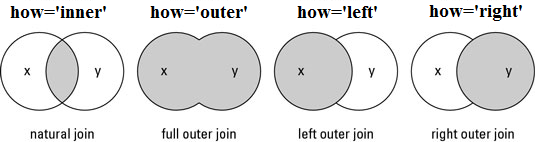

In [63]:
# Вот так: 

In [164]:
df_info = pd.read_csv('~/data-sci-econ-20/sem06_eda/data_football_info.csv', sep='\t')

joined_dfs = df_info.set_index('Name').join(df.set_index('Name'), how='inner').reset_index()
joined_dfs.head(5)

Name  Unnamed: 0 Position  Crossing  Finishing  HeadingAccuracy  \
0        A. Abang      8574.0       ST      30.0       61.0             67.0   
1   A. Abdellaoui     10604.0      NaN      56.0       25.0             56.0   
2         A. Abdi      2188.0       CM      68.0       61.0             59.0   
3   A. Abdu Jaber      7807.0       ST      39.0       66.0              NaN   
4  A. Abdulhameed     11820.0       GK      10.0        9.0             13.0   

   ShortPassing  Volleys  Dribbling  Curve  ...  GKDiving  GKHandling  \
0          52.0     58.0        NaN   30.0  ...       6.0         6.0   
1           NaN     32.0       39.0   30.0  ...      15.0        10.0   
2          74.0     64.0       70.0   68.0  ...       9.0         6.0   
3          49.0     64.0       61.0   59.0  ...       7.0        11.0   
4          26.0      6.0        6.0   11.0  ...      59.0        57.0   

   GKKicking  GKPositioning  GKReflexes   Age   Nationality  \
0        7.0           13.0         9.0  21.0      Cameroon   
1       14.0           13.0        14.0  25.0       Algeria   
2        8.0           11.0         8.0  31.0   Switzerland   
3        7.0            6.0        12.0  21.0       Eritrea   
4       51.0           52.0        58.0  24.0  Saudi Arabia   

                  Club     Value   Salary  
0   New York Red Bulls  425000.0   2000.0  
1              FC Sion  170000.0   4000.0  
2  Sheffield Wednesday  900000.0  13000.0  
3             Al Wehda  475000.0   4000.0  
4             Al Hazem   80000.0   1000.0  

[5 rows x 42 columns]

In [170]:
df_info.set_index('Name').join(df.set_index('Name'), how='inner').reset_index()

Name  Unnamed: 0 Position  Crossing  Finishing  \
0            A. Abang      8574.0       ST      30.0       61.0   
1       A. Abdellaoui     10604.0      NaN      56.0       25.0   
2             A. Abdi      2188.0       CM      68.0       61.0   
3       A. Abdu Jaber      7807.0       ST      39.0       66.0   
4      A. Abdulhameed     11820.0       GK      10.0        9.0   
...               ...         ...      ...       ...        ...   
12198    Éverton Luiz      3253.0      CDM      63.0       42.0   
12199           Ícaro      3685.0      RCB      27.0       17.0   
12200     Íñigo López      3939.0      LCB      37.0       27.0   
12201     Óscar Plano      1258.0       LM      74.0       74.0   
12202   Óscar Whalley      5040.0      NaN      24.0       17.0   

       HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  ...  \
0                 67.0          52.0     58.0        NaN   30.0  ...   
1                 56.0           NaN     32.0       39.0   30.0  ...   
2                 59.0          74.0     64.0       70.0   68.0  ...   
3                  NaN          49.0     64.0       61.0   59.0  ...   
4                 13.0          26.0      6.0        6.0   11.0  ...   
...                ...           ...      ...        ...    ...  ...   
12198             56.0          62.0     57.0       62.0   38.0  ...   
12199             62.0          48.0     25.0       40.0   21.0  ...   
12200              NaN          59.0      NaN       46.0   54.0  ...   
12201             46.0           NaN     58.0       72.0   78.0  ...   
12202             13.0          32.0     14.0       16.0   14.0  ...   

       GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes   Age  \
0           6.0         6.0        7.0           13.0         9.0  21.0   
1          15.0        10.0       14.0           13.0        14.0  25.0   
2           9.0         6.0        8.0           11.0         8.0  31.0   
3           7.0        11.0        7.0            6.0        12.0  21.0   
4          59.0        57.0       51.0           52.0        58.0  24.0   
...         ...         ...        ...            ...         ...   ...   
12198      10.0         8.0       10.0           14.0        11.0  30.0   
12199       9.0         8.0        7.0            9.0         5.0  29.0   
12200      11.0        10.0       16.0            NaN         NaN  35.0   
12201       8.0        14.0        NaN            8.0        13.0  27.0   
12202      66.0        65.0       68.0           63.0        66.0  24.0   

        Nationality                 Club      Value   Salary  
0          Cameroon   New York Red Bulls   425000.0   2000.0  
1           Algeria              FC Sion   170000.0   4000.0  
2       Switzerland  Sheffield Wednesday   900000.0  13000.0  
3           Eritrea             Al Wehda   475000.0   4000.0  
4      Saudi Arabia             Al Hazem    80000.0   1000.0  
...             ...                  ...        ...      ...  
12198        Brazil                 SPAL   575000.0   5000.0  
12199        Brazil           CD Tondela   600000.0   2000.0  
12200         Spain       Extremadura UD   150000.0   2000.0  
12201         Spain   Real Valladolid CF  6000000.0  18000.0  
12202         Spain            Aarhus GF   525000.0   2000.0  

[12203 rows x 42 columns]